In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
from tensorflow import keras

In [3]:
# Load the Dataset
df = pd.read_csv('Dataset/malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
features = df.columns
print(features)

Index(['url', 'type'], dtype='object')


In [5]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [6]:
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [7]:
# pip install wordcloud

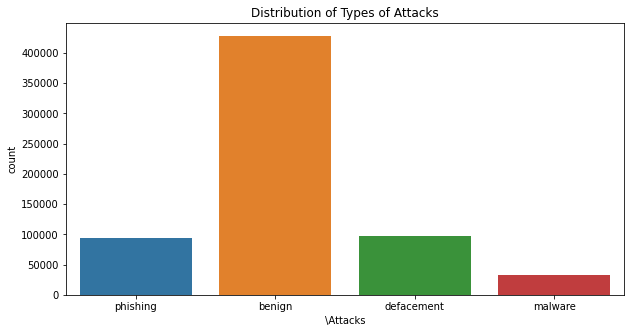

In [8]:
plt.figure(figsize= (10 , 5))
plt.title('Distribution of Types of Attacks')
sns.countplot(x = 'type', data = df)
# ax.bar_label(ax.containers[0])
plt.xlabel('\Attacks')
plt.savefig('./Images/Distribution of Types of Attacks.png', bbox_inches='tight')

# Feature Engineering

#### In this step, we will extract the following lexical features from raw URLs, as these features will be used as the input features for training the machine learning model. The following features are created as follows:

### having_ip_address: 
Generally cyber attackers use an IP address in place of the domain name to hide the identity of the website. this feature will check whether the URL has IP address or not.

In [14]:
import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    
    
    if match:

        return 1
    else:

        return 0

df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [15]:
df['use_of_ip'].value_counts()

0    643898
1      7293
Name: use_of_ip, dtype: int64

In [16]:
df[df['use_of_ip'] == 1]

,url,type,use_of_ip
10408,http://219.232.244.89/intl/update/error_login.htm,phishing,1
12441,boards.ancestry.com/topics.ethnic.natam.nation...,benign,1
12853,http://www.controlyourbreath.com/new/css_/img/...,phishing,1
13161,http://www.reqntpvw.com/Public/softs/everythin...,malware,1
14915,http://66.208.115.70/images/index.asp,phishing,1
...,...,...,...
598624,helapharm.ro/css_/img/webscr/cmd_/e2tUc17DNO4H...,benign,1
598638,helapharm.ro/css_/img/webscr/cmd_/e2tUc17DNO4H...,benign,1
601657,www.mairie-saint-avold.fr/admin/125.14.226.143...,benign,1
601697,www.mairie-saint-avold.fr/admin/190.244.107.16...,benign,1


Text(0.5, 1.0, 'Usage of Ip Address in domain name in Diffrent types of attacks')

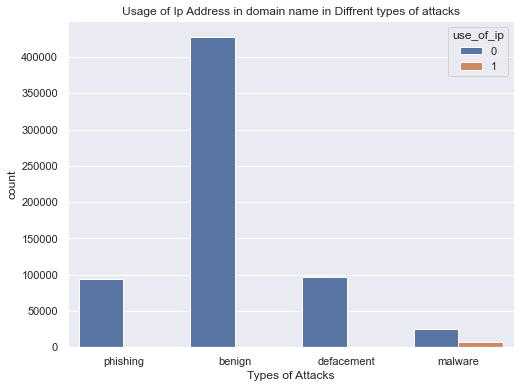

In [17]:

plt.figure(figsize = (8 , 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, hue="use_of_ip")
plt.xlabel('Types of Attacks')
plt.title("Usage of Ip Address in domain name in Diffrent types of attacks")

In [18]:
arr = np.where(df[df['type'] == 'benign']['use_of_ip'] == 1)
arr[0].shape

(89,)

In [19]:
arr = np.where(df[df['type'] == 'malware']['use_of_ip'] == 1)
arr[0].shape

(6870,)

In [20]:
arr = np.where(df[df['type'] == 'phishing']['use_of_ip'] == 1)
arr[0].shape

(334,)

In [21]:
arr = np.where(df[df['type'] == 'defacement']['use_of_ip'] == 1)
arr[0].shape

(0,)

### Abnormal URL

This feature can be extracted from the WHOIS database. For a legitimate website, identity is typically part of its URL.

In [22]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:      
        return 1
    else:
       
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [23]:
df['abnormal_url'].value_counts()

0    463185
1    188006
Name: abnormal_url, dtype: int64

Text(0.5, 1.0, 'Usage of Ip Address in domain name in Diffrent types of attacks')

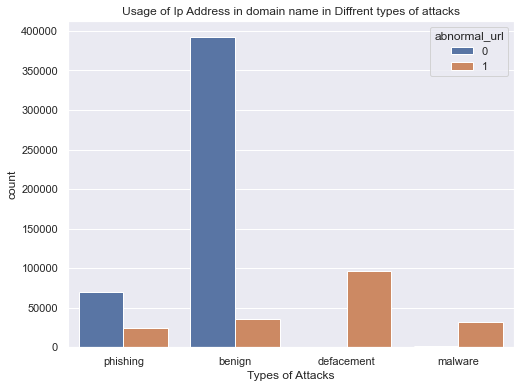

In [24]:
plt.figure(figsize = (8 , 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, hue="abnormal_url")
plt.xlabel('Types of Attacks')
plt.title("Usage of Ip Address in domain name in Diffrent types of attacks")

In [25]:
arr = df[df['type'] == 'benign']['abnormal_url'].value_counts()
# arr[0].shape
arr

0    392709
1     35394
Name: abnormal_url, dtype: int64

In [26]:
arr = df[df['type'] == 'phishing']['abnormal_url'].value_counts()
# arr[0].shape
arr

0    69266
1    24845
Name: abnormal_url, dtype: int64

In [27]:
arr = df[df['type'] == 'defacement']['abnormal_url'].value_counts()
# arr[0].shape
arr

1    96457
Name: abnormal_url, dtype: int64

In [28]:
arr = df[df['type'] == 'malware']['abnormal_url'].value_counts()
# arr[0].shape
arr

1    31310
0     1210
Name: abnormal_url, dtype: int64

In [29]:
# pip install googlesearch-python

In [30]:
from googlesearch import search

### google_index:
In this feature, we check whether the URL is indexed in google search console or not.

In [31]:
def google_index(url):
    
    site = search(url, 5)
    return 1 if site else 0

df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [32]:
print(df['url'][0])
for j in search(df['url'][0], num_results=10):
    print(j)

br-icloud.com.br
https://www.apple.com/br/icloud/
https://www.icloud.com/
https://www.icloud.com/?s=Iseo
https://www.icloud.com/?q=/
https://www.icloud.com/?p=6
https://www.icloud.com/?w
https://www.icloud.com/?lang=th
https://www.icloud.com/find
https://www.icloud.com/iclouddrive
https://www.icloud.com.br/
https://canaltech.com.br/ios/como-acessar-a-nuvem-do-iphone/


In [33]:
df['google_index'].value_counts()

1    651191
Name: google_index, dtype: int64

### Count dot (.) : 
The phishing or malware websites generally use more than two sub-domains in the URL. Each domain is separated by dot (.). If any URL contains more than three dots(.), then it increases the probability of a malicious site.

In [34]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

In [35]:
df['count.'].value_counts()

2     236038
1     219105
3     129667
4      40227
5       9436
6       5729
7       3570
8       1566
9       1150
10      1114
11       973
12       757
13       505
14       379
15       259
16       144
20       129
17       118
19        88
18        70
0         61
22        24
24        22
21        18
23        10
25         9
36         5
27         4
26         4
42         3
35         3
31         1
37         1
34         1
28         1
Name: count., dtype: int64

Text(0.5, 1.0, 'No. Of Dots Available in URLS ')

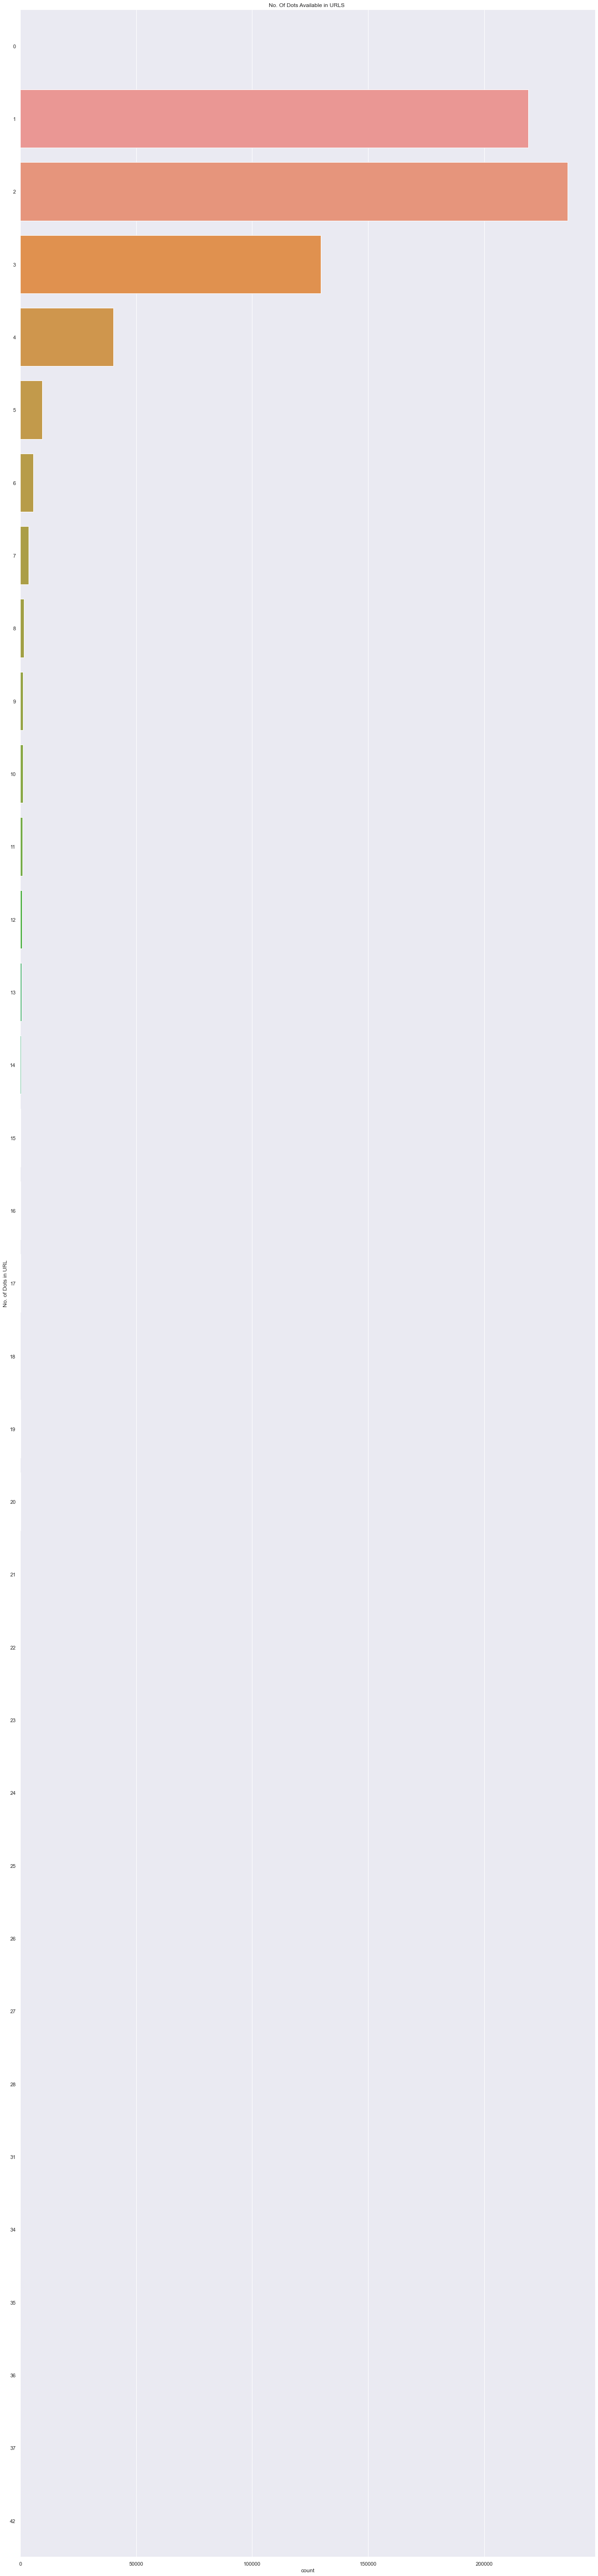

In [36]:
plt.figure(figsize = (22 , 100))
sns.set(style="darkgrid")
ax = sns.countplot(y="count.", data=df)
plt.ylabel('No. of Dots in URL')
plt.title("No. Of Dots Available in URLS ")

### Count-www: 
Generally most of the safe websites have one www in its URL. This feature helps in detecting malicious websites if the URL has no or more than one www in its URL.

In [37]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

In [38]:
df['count-www'].value_counts()

0    525525
1    124178
2      1422
3        58
4         7
5         1
Name: count-www, dtype: int64

Text(0.5, 1.0, 'No. Of WWW Available in URLS ')

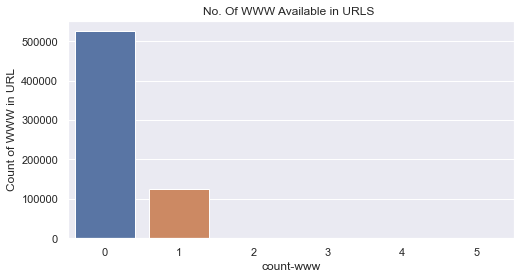

In [39]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count-www", data=df)
plt.ylabel('Count of WWW in URL')
plt.title("No. Of WWW Available in URLS ")

### count@: 
The presence of the “@” symbol in the URL ignores everything previous to it. 

In [40]:
def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [41]:
df['count@'].value_counts()

0     649845
1       1290
2         40
3          9
4          3
10         3
6          1
Name: count@, dtype: int64

Text(0.5, 1.0, 'No. Of @ Available in URLS ')

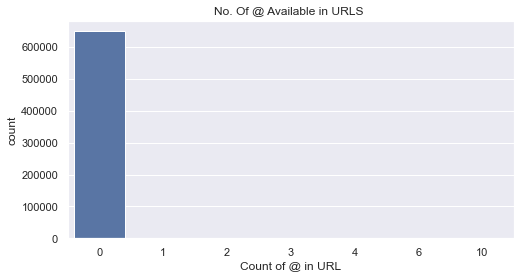

In [42]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count@", data=df)
plt.xlabel('Count of @ in URL')
plt.title("No. Of @ Available in URLS ")

### Count_dir: 
The presence of multiple directories in the URL generally indicates suspicious websites.

In [43]:
def no_of_dir(url):
    urldir = urlparse(url).path
#     print(urldir)
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [44]:
print(df['url'][5])
no_of_dir(df['url'][5])

http://buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2.html


3

In [45]:
df['count_dir'].value_counts()

1     208263
2     185322
3     120164
4      53510
5      35379
0      23046
6      14204
7       5671
8       2326
10      1362
9        966
11       343
13       176
12       165
14       161
16        50
15        32
22        12
18        10
17         9
21         5
19         3
24         2
27         2
23         2
39         1
28         1
25         1
20         1
32         1
34         1
Name: count_dir, dtype: int64

### Count_embed_domain: 
The number of the embedded domains can be helpful in detecting malicious URLs. It can be done by checking the occurrence of “//” in the URL.


In [46]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))

In [47]:
def no_of_embed(url):
    urldir = urlparse(url).path
    
    print(urldir)
    return urldir.count('//')

print(df['url'][7])
no_of_embed(df['url'][7])


yourbittorrent.com/?q=anthony-hamilton-soulife
yourbittorrent.com/


0

In [48]:
df['count_embed_domain'].value_counts()

0    650205
1       974
2        12
Name: count_embed_domain, dtype: int64

Text(0.5, 1.0, 'No. Of embedded domain Available in URLS ')

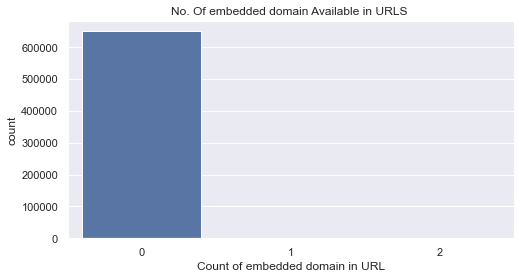

In [49]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_embed_domain", data=df)
plt.xlabel('Count of embedded domain in URL')
plt.title("No. Of embedded domain Available in URLS ")

### Suspicious words in URL: 
Malicious URLs generally contain suspicious words in the URL such as PayPal, login, sign in, bank, account, update, bonus, service, ebayisapi, token, etc. We have found the presence of such frequently occurring suspicious words in the URL as a binary variable i.e., whether such words present in the URL or not.

In [50]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
    
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [51]:
df['sus_url'].value_counts()

0    607818
1     43373
Name: sus_url, dtype: int64

Text(0.5, 1.0, 'No. Of Suspicious Words  Available in URLS ')

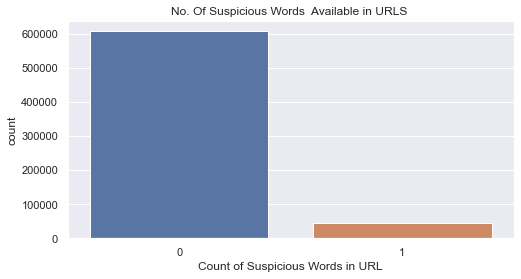

In [52]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="sus_url", data=df)
plt.xlabel('Count of Suspicious Words in URL')
plt.title("No. Of Suspicious Words  Available in URLS ")

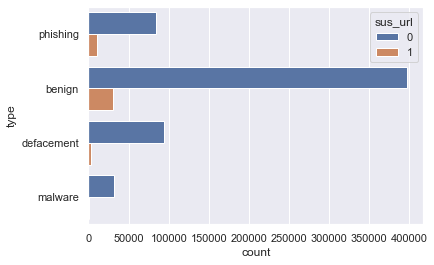

In [53]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="sus_url")

### Short_url: 
This feature is created to identify whether the URL uses URL shortening services like bit. \ly, goo.gl, go2l.ink, etc.

In [54]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [55]:
df['short_url'].value_counts()

0    611436
1     39755
Name: short_url, dtype: int64

Text(0.5, 1.0, 'Identify whether the URL uses URL shortening services')

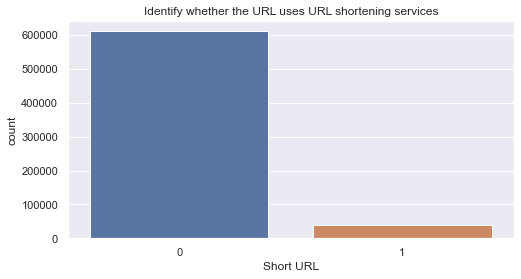

In [56]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="short_url", data=df)
plt.xlabel('Short URL')
plt.title("Identify whether the URL uses URL shortening services")

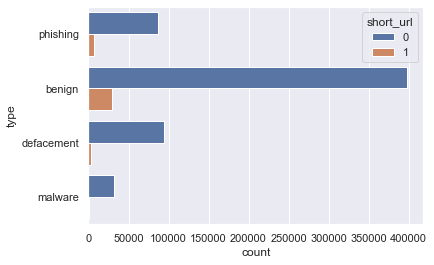

In [57]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="short_url")

In [58]:
df[df['type'] == 'benign']['short_url'].value_counts()

0    398492
1     29611
Name: short_url, dtype: int64

In [59]:
df[df['type'] == 'phishing']['short_url'].value_counts()

0    87275
1     6836
Name: short_url, dtype: int64

In [60]:
df[df['type'] == 'malware']['short_url'].value_counts()

0    31813
1      707
Name: short_url, dtype: int64

In [61]:
df[df['type'] == 'defacement']['short_url'].value_counts()

0    93856
1     2601
Name: short_url, dtype: int64

### Count_https: 
Generally malicious URLs do not use HTTPS protocols as it generally requires user credentials and ensures that the website is safe for transactions. So, the presence or absence of HTTPS protocol in the URL is an important feature.

In [62]:
def count_https(url):
    return url.count('https')

df['count_https'] = df['url'].apply(lambda i : count_https(i))


In [63]:
df['count_https'].value_counts()

0    634768
1     16197
2       183
3        34
5         6
4         3
Name: count_https, dtype: int64

Text(0.5, 1.0, 'Identify the no. of Https in URLs')

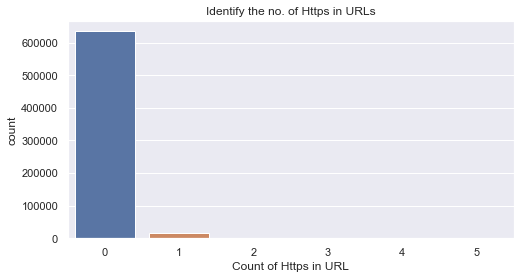

In [64]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_https", data=df)
plt.xlabel('Count of Https in URL')
plt.title("Identify the no. of Https in URLs")

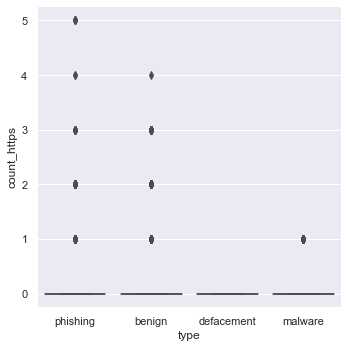

In [65]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_https", kind="box", data=df)


<AxesSubplot:xlabel='count', ylabel='type'>

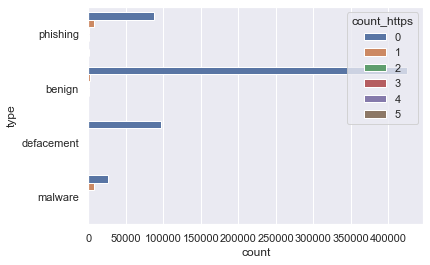

In [66]:
sns.countplot(y = 'type', data = df, hue = 'count_https')

In [67]:
df[df['type'] == 'benign']['count_https'].value_counts()

0    425707
1      2325
2        47
3        23
4         1
Name: count_https, dtype: int64

In [68]:
df[df['type'] == 'phishing']['count_https'].value_counts()

0    86848
1     7108
2      136
3       11
5        6
4        2
Name: count_https, dtype: int64

In [69]:
df[df['type'] == 'malware']['count_https'].value_counts()

0    25756
1     6764
Name: count_https, dtype: int64

In [70]:
df[df['type'] == 'defacement']['count_https'].value_counts()

0    96457
Name: count_https, dtype: int64

### Count_http: 
Most of the time, phishing or malicious websites have more than one HTTP in their URL whereas safe sites have only one HTTP.

In [71]:
def count_http(url):
    return url.count('http')

df['count_http'] = df['url'].apply(lambda i : count_http(i))

In [72]:
df['count_http'].value_counts()

0    461527
1    186625
2      2564
3       455
4        11
9         6
6         2
5         1
Name: count_http, dtype: int64

Text(0.5, 1.0, 'Identify the no. of Http in URLs')

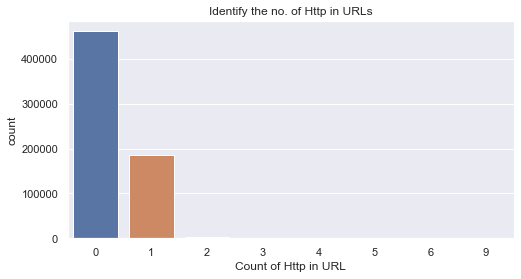

In [73]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_http", data=df)
plt.xlabel('Count of Http in URL')
plt.title("Identify the no. of Http in URLs")

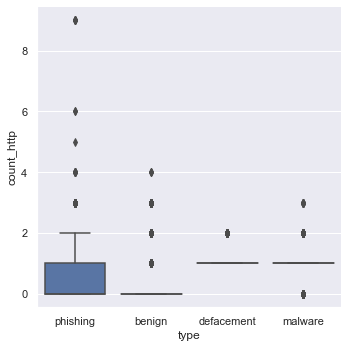

In [74]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_http", kind="box", data=df)


<AxesSubplot:xlabel='count', ylabel='type'>

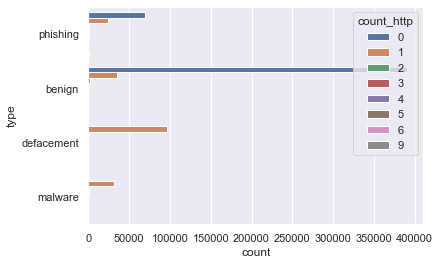

In [75]:
sns.countplot(y = 'type', data = df, hue = 'count_http')

In [76]:
df[df['type'] == 'benign']['count_http'].value_counts()

0    391104
1     35437
2      1491
3        68
4         3
Name: count_http, dtype: int64

In [77]:
df[df['type'] == 'phishing']['count_http'].value_counts()

0    69215
1    23644
2      858
3      377
4        8
9        6
6        2
5        1
Name: count_http, dtype: int64

In [78]:
df[df['type'] == 'defacement']['count_http'].value_counts()

1    96382
2       75
Name: count_http, dtype: int64

In [79]:
df[df['type'] == 'malware']['count_http'].value_counts()

1    31162
0     1208
2      140
3       10
Name: count_http, dtype: int64

### Count%: 
As we know URLs cannot contain spaces. URL encoding normally replaces spaces with symbol (%). Safe sites generally contain less number of spaces whereas malicious websites generally contain more spaces in their URL hence more number of %.

In [80]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

In [81]:
df['count%'].value_counts()

0      623991
1        5824
2        4981
3        2415
6        1710
        ...  
133         1
130         1
93          1
201         1
149         1
Name: count%, Length: 124, dtype: int64

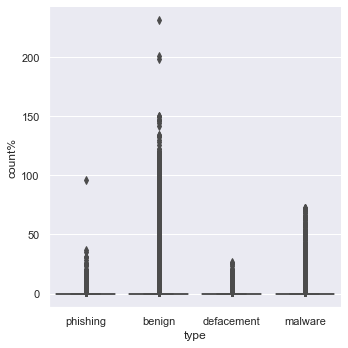

In [82]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count%", kind="box", data=df)

### Count?: 
The presence of symbol (?) in URL denotes a query string that contains the data to be passed to the server. More number of ? in URL definitely indicates suspicious URL.


In [83]:
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

In [84]:
df['count?'].value_counts()

0     511013
1     134983
2       5065
3         69
4         25
5         11
7          7
8          3
6          3
11         3
12         2
13         2
10         1
20         1
15         1
14         1
17         1
Name: count?, dtype: int64

Text(0.5, 1.0, 'Identify the no. of (?) in URLs')

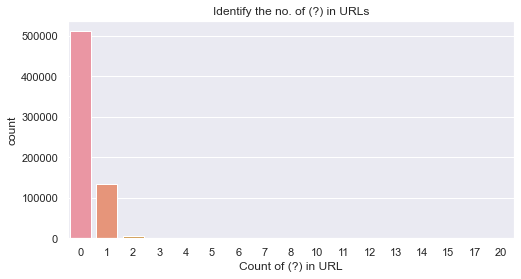

In [85]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count?", data=df)
plt.xlabel('Count of (?) in URL')
plt.title("Identify the no. of (?) in URLs")

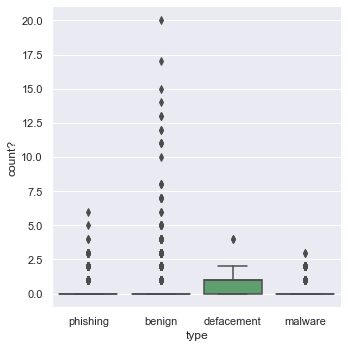

In [86]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count?", kind="box", data=df)

### Count-: 
Phishers or cybercriminals generally add dashes(-) in prefix or suffix of the brand name so that it looks genuine URL. For example. www.flipkart-india.com. 

In [87]:
def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

In [88]:
df['count-'].value_counts()

0     377210
1     104187
2      44061
3      27016
4      22128
5      16145
6      12277
7       9347
8       8400
9       6775
10      6050
11      4710
12      3567
13      2769
14      1990
15      1414
16       924
17       694
18       411
19       269
20       186
21       151
22       100
23        88
24        61
25        42
26        35
27        34
28        32
29        26
31        16
30        12
32         9
34         9
33         5
35         5
38         5
36         4
47         4
41         4
40         3
42         3
37         3
39         3
64         3
48         1
50         1
87         1
54         1
Name: count-, dtype: int64

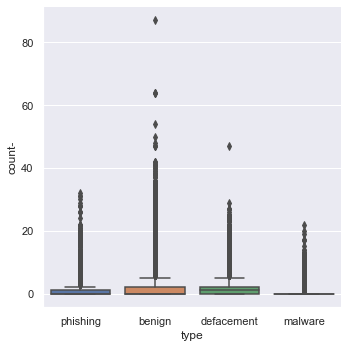

In [89]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-", kind="box", data=df)

### Count=: 
Presence of equal to (=) in URL indicates passing of variable values from one form page to another. It is considered as riskier in URL as anyone can change the values to modify the page.

In [90]:
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

In [91]:
df['count='].value_counts()

0     510898
1      54747
2      23212
4      21442
3      14951
5      13443
6       5685
9       2391
7       1981
8       1340
10       344
11       212
12       163
19       127
13       118
14        68
15        19
16        10
17         9
18         7
22         7
34         4
24         4
28         3
20         1
21         1
39         1
29         1
51         1
26         1
Name: count=, dtype: int64

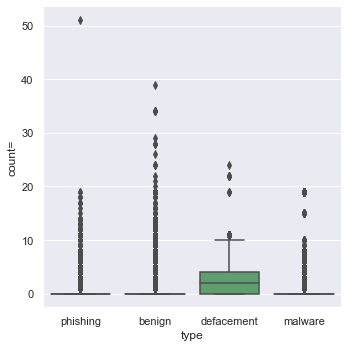

In [92]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count=", kind="box", data=df)

### url_length: 
Attackers generally use long URLs to hide the domain name. We found the average length of a safe URL is 74.

In [93]:
def url_length(url):
    return len(str(url))

df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [94]:
df['url_length'].value_counts()

31      19023
33      14209
34      12243
27      11967
35      11700
        ...  
710         1
1016        1
452         1
1779        1
467         1
Name: url_length, Length: 549, dtype: int64

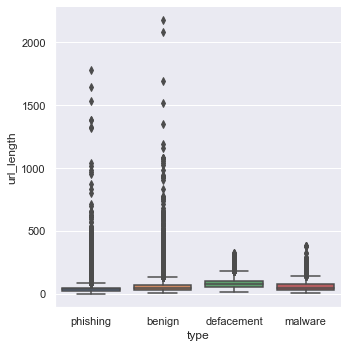

In [95]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="url_length", kind="box", data=df)

### hostname_length:
The length of the hostname is also an important feature for detecting malicious URLs.

In [96]:
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

In [97]:
df['hostname_length'].value_counts()

0      463192
15      15950
13      14592
14      14061
20      12039
        ...  
210         1
125         1
184         1
129         1
179         1
Name: hostname_length, Length: 134, dtype: int64

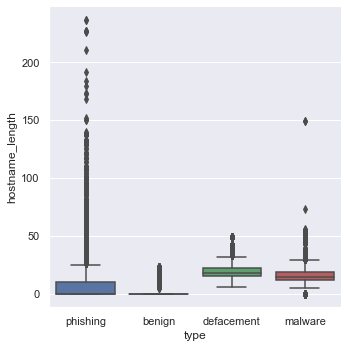

In [98]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="hostname_length", kind="box", data=df)

### First directory length: 
This feature helps in determining the length of the first directory in the URL. So looking for the first ‘/’ and counting the length of the URL up to this point helps in finding the first directory length of the URL. For accessing directory level information we need to install python library TLD. You can check this link for installing TLD.

In [99]:
pip install tld

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [100]:
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [101]:
df['fd_length'].value_counts()

9      83387
4      80768
0      77782
6      51283
5      50371
       ...  
239        1
256        1
248        1
146        1
230        1
Name: fd_length, Length: 218, dtype: int64

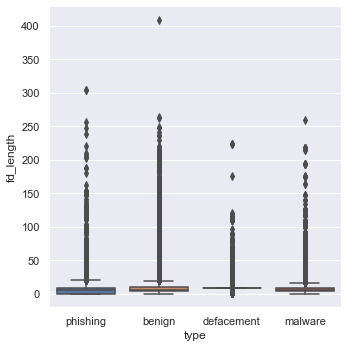

In [102]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="fd_length", kind="box", data=df)

### Length of top-level domains: 
A top-level domain (TLD) is one of the domains at the highest level in the hierarchical Domain Name System of the Internet. For example, in the domain name www.example.com, the top-level domain is com. So, the length of TLD is also important in identifying malicious URLs. As most of the URLs have .com extension. TLDs in the range from 2 to 3 generally indicate safe URLs.

In [103]:
#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [104]:
df['tld']

0         None
1         None
2         None
3           be
4          net
          ... 
651186    None
651187    None
651188    None
651189    None
651190    None
Name: tld, Length: 651191, dtype: object

In [105]:
df['tld'].value_counts()

com       71690
de        11331
net        9903
nl         6157
com.br     5925
          ...  
gov.sa        1
tn            1
click         1
gt            1
ht            1
Name: tld, Length: 538, dtype: int64

In [106]:
df['tld_length'].value_counts()

-1     475281
 3      87519
 2      58686
 6      16601
 5       6203
 4       5405
 12       455
 14       307
 7        249
 9        130
 11       121
 16        71
 15        52
 8         50
 10        12
 13        12
 17         9
 26         8
 20         3
 30         3
 31         2
 21         2
 39         2
 22         2
 25         2
 18         2
 34         1
 27         1
Name: tld_length, dtype: int64

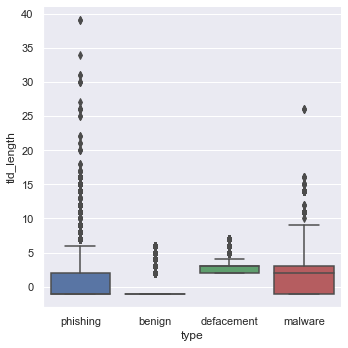

In [107]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="tld_length", kind="box", data=df)

In [108]:
df.drop(["tld"], axis = 1, inplace = True)

### Count_digits: 
The presence of digits in URL generally indicate suspicious URLs. Safe URLs generally do not have digits so counting the number of digits in URL is an important feature for detecting malicious URLs.

In [109]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits


df['count_digits']= df['url'].apply(lambda i: digit_count(i))

In [110]:
df['count_digits'].value_counts()

0      277500
4       41826
2       36989
1       35880
6       34093
        ...  
250         1
267         1
240         1
272         1
151         1
Name: count_digits, Length: 222, dtype: int64

In [111]:
df['count_digits'].describe()

count    651191.000000
mean          5.527409
std          11.700814
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max        1204.000000
Name: count_digits, dtype: float64

### Count_letters: 
The number of letters in the URL also plays a significant role in identifying malicious URLs. As attackers try to increase the length of the URL to hide the domain name and this is generally done by increasing the number of letters and digits in the URL. 

In [112]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters


df['count_letters']= df['url'].apply(lambda i: letter_count(i))


In [113]:
df['count_letters'].value_counts()

26     16704
25     16617
27     15503
24     15142
28     15054
       ...  
801        1
748        1
754        1
371        1
343        1
Name: count_letters, Length: 425, dtype: int64

In [114]:
df['count_letters'].describe()

count    651191.000000
mean         45.247104
std          31.624502
min           0.000000
25%          25.000000
50%          37.000000
75%          58.000000
max        2141.000000
Name: count_letters, dtype: float64

In [115]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domain,...,count%,count?,count-,count=,url_length,hostname_length,fd_length,tld_length,count_digits,count_letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,1,0,16,0,0,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,35,0,5,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,31,0,7,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,0,1,1,4,88,21,9,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,0,1,1,3,235,23,9,3,22,199


# Label Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type_code'] = label_encoder.fit_transform(df['type'])
df['type_code'].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

In [117]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domain', 'sus_url',
       'short_url', 'count_https', 'count_http', 'count%', 'count?', 'count-',
       'count=', 'url_length', 'hostname_length', 'fd_length', 'tld_length',
       'count_digits', 'count_letters', 'type_code'],
      dtype='object')

# Creation of Feature & Target

In [118]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domain', 'short_url', 'count_https',
       'count_http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count_digits',
       'count_letters']]

In [119]:
Y = df['type_code']

In [120]:
X.shape

(651191, 21)

In [121]:
Y.shape

(651191,)

# Split the Dataset

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , shuffle = True, random_state = 42)

In [124]:
X_train.shape , Y_train.shape

((520952, 21), (520952,))

In [125]:
X_test.shape , Y_test.shape

((130239, 21), (130239,))

In [126]:
X_train.dtypes

use_of_ip             int64
abnormal_url          int64
count.                int64
count-www             int64
count@                int64
count_dir             int64
count_embed_domain    int64
short_url             int64
count_https           int64
count_http            int64
count%                int64
count?                int64
count-                int64
count=                int64
url_length            int64
hostname_length       int64
sus_url               int64
fd_length             int64
tld_length            int64
count_digits          int64
count_letters         int64
dtype: object

In [127]:
X_train.values

array([[ 0,  0,  2, ..., -1,  0, 34],
       [ 0,  0,  2, ..., -1,  3, 19],
       [ 0,  0,  2, ..., -1,  0, 26],
       ...,
       [ 0,  1,  3, ...,  2, 11, 67],
       [ 0,  0,  2, ..., -1,  7, 39],
       [ 0,  0,  2, ..., -1,  0, 35]], dtype=int64)

# Model Building

## Classification report Fuction

In [128]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support, classification_report

def result(y_pred , y_test):
    accuracy = accuracy_score(y_test, y_pred) * 100
#     print(accuracy)
    
    precision , recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    
    res = {
        "Accuracy": accuracy,
        "Precision" : precision,
        "Recall" : recall,
        "F1-Score" : f1_score,
        "Support" : support
    }
    
    print(classification_report(y_test, y_pred ,target_names=['benign', 'defacement','phishing','malware']))
    
    
    
    return res
    

In [129]:
from sklearn.metrics import confusion_matrix

def create_confusion_metric(y_pred , y_test):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True,fmt=".1f")
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [130]:
?aa?===

Object `aa?===` not found.


## 1. Naive Bayes

#### Gausian Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [132]:
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

array([2, 0, 3, ..., 0, 0, 0])

In [133]:
result(Y_test, y_pred_gnb)

              precision    recall  f1-score   support

      benign       0.89      0.91      0.90     84148
  defacement       1.00      0.64      0.78     29928
    phishing       0.54      0.59      0.57      6008
     malware       0.39      0.72      0.50     10155

    accuracy                           0.81    130239
   macro avg       0.70      0.71      0.69    130239
weighted avg       0.86      0.81      0.82    130239



{'Accuracy': 81.4802017828761,
 'Precision': 0.8584704976998739,
 'Recall': 0.8148020178287609,
 'F1-Score': 0.82353055668684,
 'Support': None}

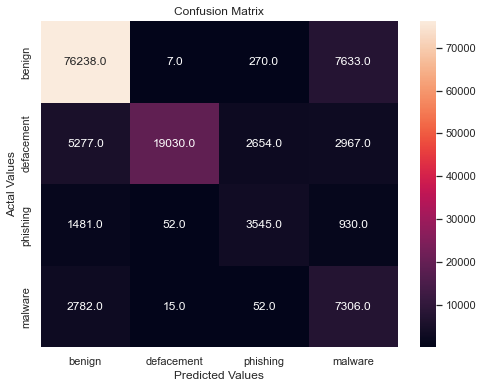

In [134]:
create_confusion_metric(Y_test , y_pred_gnb)

#### Multinomial Naive Bayes

In [135]:
X_df = X_train.drop(['tld_length'], axis = 1)
X_test_df = X_test.drop(['tld_length'], axis = 1)

In [136]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_df, Y_train)

MultinomialNB()

In [137]:
y_pred_mnb = mnb.predict(X_test_df)
y_pred_mnb

array([2, 0, 0, ..., 0, 0, 0])

In [138]:
result(Y_test, y_pred_mnb)

              precision    recall  f1-score   support

      benign       0.92      0.85      0.89     93334
  defacement       0.91      0.73      0.81     23825
    phishing       0.63      0.56      0.59      7301
     malware       0.09      0.29      0.13      5779

    accuracy                           0.79    130239
   macro avg       0.64      0.61      0.61    130239
weighted avg       0.87      0.79      0.82    130239



{'Accuracy': 78.71374933775597,
 'Precision': 0.8689043911496918,
 'Recall': 0.7871374933775597,
 'F1-Score': 0.8226276869320237,
 'Support': None}

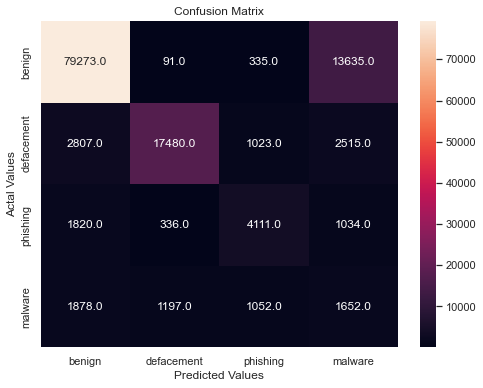

In [139]:
create_confusion_metric(Y_test , y_pred_mnb)

#### Bernoulli Naive Bayes

In [140]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train , Y_train)


BernoulliNB()

In [141]:
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array([2, 0, 3, ..., 0, 0, 0])

In [142]:
result(Y_test, y_pred_bnb)

              precision    recall  f1-score   support

      benign       0.90      0.93      0.92     83501
  defacement       0.98      0.66      0.79     28625
    phishing       0.74      0.56      0.64      8719
     malware       0.44      0.88      0.58      9394

    accuracy                           0.84    130239
   macro avg       0.77      0.75      0.73    130239
weighted avg       0.88      0.84      0.85    130239



{'Accuracy': 84.06621672463702,
 'Precision': 0.8777021137097988,
 'Recall': 0.8406621672463701,
 'F1-Score': 0.8457018719312173,
 'Support': None}

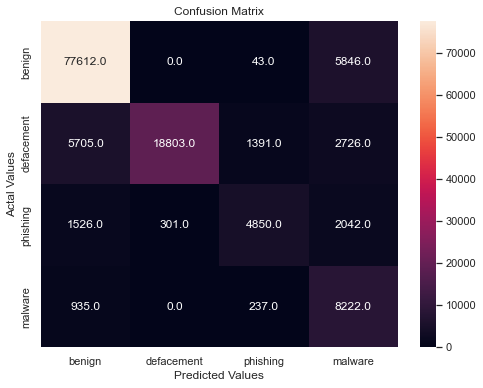

In [143]:
create_confusion_metric(Y_test , y_pred_bnb)

## 2. Random Forest Classification

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [145]:
y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85778
  defacement       0.98      0.99      0.99     19104
    phishing       0.99      0.94      0.96      6521
     malware       0.91      0.87      0.89     18836

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239



In [146]:
result(Y_test , y_pred_rf)

              precision    recall  f1-score   support

      benign       0.98      0.97      0.98     86655
  defacement       0.99      0.98      0.99     19357
    phishing       0.94      0.99      0.96      6197
     malware       0.87      0.91      0.89     18030

    accuracy                           0.97    130239
   macro avg       0.95      0.96      0.95    130239
weighted avg       0.97      0.97      0.97    130239



{'Accuracy': 96.65998663994657,
 'Precision': 0.9674554695049024,
 'Recall': 0.9665998663994656,
 'F1-Score': 0.9669160225709188,
 'Support': None}

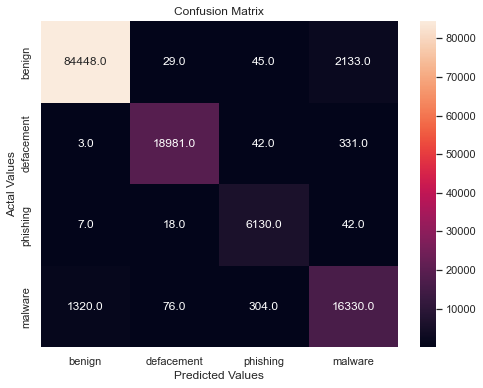

In [147]:
create_confusion_metric(Y_test , y_pred_rf)

In [149]:
# rf.predict(['http://google.com'])

# Deep Learning Models

In [150]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.models import Sequential


In [151]:
X_train_df = X_train.to_numpy()
X_test_df = X_test.to_numpy()
Y_train_df = Y_train.to_numpy()
Y_test_df = Y_test.to_numpy()

X_train_df.shape

(520952, 21)

## Bidirectional LSTM RNN

In [170]:
model_BiLSTM = Sequential([
    
    layers.InputLayer(input_shape=(21, 1)),
    
    layers.Bidirectional(layers.LSTM(128, activation = 'tanh' , return_sequences=True)),
    
    layers.Bidirectional(layers.LSTM(128, activation = 'tanh' , return_sequences=True)),
    
    layers.Bidirectional(layers.LSTM(256, activation = 'tanh' )),
    
    layers.Dropout(0.3),
    
    layers.Dense(128, activation= 'relu'),
    
    layers.Dropout(0.2),
    
    layers.Dense(4 , activation='softmax')
    
])

In [171]:
model_BiLSTM.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [172]:
model_BiLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 21, 256)          133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 21, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                      

In [173]:
History_BiLSTM = model_BiLSTM.fit(
    x = X_train_df,
    y = Y_train_df,
    batch_size= 128,
    epochs= 25,
    shuffle = True,
    validation_data= (X_test_df, Y_test_df),
    verbose = 1,
)

Epoch 1/25
4070/4070 [==============================] - 1340s 328ms/step - loss: 0.2430 - accuracy: 0.9163 - val_loss: 0.1731 - val_accuracy: 0.9428
Epoch 2/25
4070/4070 [==============================] - 239s 59ms/step - loss: 0.1680 - accuracy: 0.9448 - val_loss: 0.1505 - val_accuracy: 0.9512
Epoch 3/25
4070/4070 [==============================] - 226s 56ms/step - loss: 0.1477 - accuracy: 0.9517 - val_loss: 0.1387 - val_accuracy: 0.9537
Epoch 4/25
4070/4070 [==============================] - 223s 55ms/step - loss: 0.1374 - accuracy: 0.9547 - val_loss: 0.1298 - val_accuracy: 0.9569
Epoch 5/25
4070/4070 [==============================] - 243s 60ms/step - loss: 0.1293 - accuracy: 0.9570 - val_loss: 0.1295 - val_accuracy: 0.9568
Epoch 6/25
4070/4070 [==============================] - 241s 59ms/step - loss: 0.1234 - accuracy: 0.9591 - val_loss: 0.1232 - val_accuracy: 0.9597
Epoch 7/25
4070/4070 [==============================] - 240s 59ms/step - loss: 0.1187 - accuracy: 0.9604 - val_loss:

In [175]:
y_pred_BiLSTM = model_BiLSTM.predict(X_test_df)

4070/4070 [==============================] - 89s 21ms/step


In [176]:
y_pred_BiLSTM

array([[1.11610854e-09, 1.67245051e-09, 9.94763613e-01, 5.23640541e-03],
       [9.99717891e-01, 2.09262607e-13, 1.10236499e-06, 2.81025888e-04],
       [6.65833196e-03, 4.39666309e-14, 2.15333529e-08, 9.93341625e-01],
       ...,
       [9.99960661e-01, 1.16987007e-24, 2.96377636e-12, 3.93248047e-05],
       [9.03300166e-01, 6.16542764e-08, 9.13489566e-05, 9.66083482e-02],
       [9.96214688e-01, 1.36255075e-14, 1.00644804e-07, 3.78521788e-03]],
      dtype=float32)

In [177]:
Y_pred_BiLSTM = []

for i in y_pred_BiLSTM:
    r = np.argmax(i)
    Y_pred_BiLSTM.append(r)

Y_pred_BiLSTM 

[2,
 0,
 3,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 3,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 3,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 0,
 3,
 2,
 0,
 3,
 1,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 3,
 0,
 0,
 3,
 1,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 3,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 0,


In [178]:
result(Y_test_df , Y_pred_BiLSTM)

              precision    recall  f1-score   support

      benign       0.98      0.97      0.98     86737
  defacement       0.99      0.98      0.98     19208
    phishing       0.93      0.97      0.95      6273
     malware       0.86      0.90      0.88     18021

    accuracy                           0.96    130239
   macro avg       0.94      0.96      0.95    130239
weighted avg       0.97      0.96      0.96    130239



{'Accuracy': 96.41889142269213,
 'Precision': 0.9650656753152116,
 'Recall': 0.9641889142269213,
 'F1-Score': 0.9645293401506218,
 'Support': None}

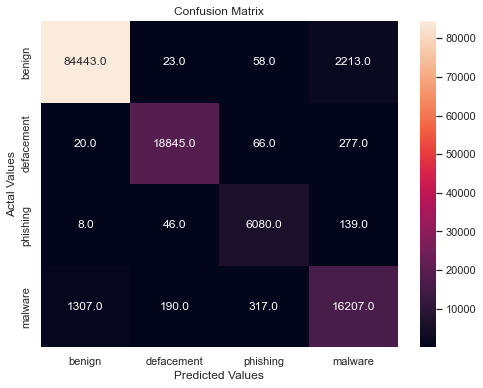

In [179]:
create_confusion_metric(Y_test_df , Y_pred_BiLSTM)

In [180]:
History_BiLSTM.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [181]:
acc_BiLSTM = History_BiLSTM.history['accuracy']
val_acc_BiLSTM = History_BiLSTM.history['val_accuracy']

loss_BiLSTM = History_BiLSTM.history['loss']
val_loss_BiLSTM = History_BiLSTM.history['val_loss']

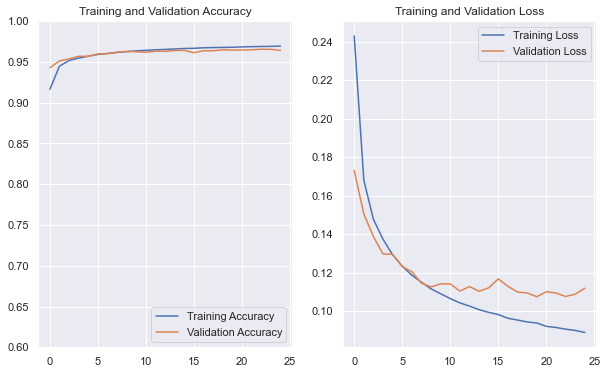

In [182]:
EPOCHS = 25

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc_BiLSTM, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc_BiLSTM, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.axis(ymin=0.6,ymax=1) 
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss_BiLSTM, label='Training Loss')
plt.plot(range(EPOCHS), val_loss_BiLSTM, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [183]:
model_BiLSTM.evaluate(X_test_df, Y_test_df)

4070/4070 [==============================] - 96s 24ms/step - loss: 0.1120 - accuracy: 0.9642


[0.11195608228445053, 0.9641889333724976]

In [184]:
model_BiLSTM.evaluate(X_train_df, Y_train_df)

16280/16280 [==============================] - 379s 23ms/step - loss: 0.0836 - accuracy: 0.9709


[0.08355937898159027, 0.9709262847900391]

In [185]:
model_BiLSTM.save('Models/Bidirectional_LSTM.h5')

In [ ]:
load_BiLSTM = keras.models.load_model('Models/Bidirectional_LSTM.h5')

In [ ]:
load_BiLSTM.evaluate(X_test_df, Y_test_df)

### Convolution 1D 

In [156]:
model_CNN = Sequential([
    
    layers.InputLayer(input_shape = (21, 1)),
    
    layers.Conv1D(filters = 64, kernel_size=3, strides= 1, padding='same', activation='relu'),
    
    
    
    layers.LSTM(128, activation='tanh', return_sequences=True),
    
    layers.GlobalMaxPooling1D(),
    
    layers.Flatten(),
    
    layers.Dense(64, activation= 'relu'),
    
    layers.Dense(4 , activation='softmax'),
    
])

In [157]:
model_CNN.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [158]:
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 21, 128)           98816     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                      

In [159]:
History_CNN = model_CNN.fit(
    x = X_train_df,
    y = Y_train_df,
    batch_size= 128,
    epochs= 25,
    shuffle = True,
    validation_data= (X_test_df, Y_test_df),
    verbose = 1,
)

Epoch 1/25
4070/4070 [==============================] - 31s 6ms/step - loss: 0.2341 - accuracy: 0.9197 - val_loss: 0.1734 - val_accuracy: 0.9424
Epoch 2/25
4070/4070 [==============================] - 25s 6ms/step - loss: 0.1678 - accuracy: 0.9445 - val_loss: 0.1567 - val_accuracy: 0.9493
Epoch 3/25
4070/4070 [==============================] - 24s 6ms/step - loss: 0.1531 - accuracy: 0.9492 - val_loss: 0.1450 - val_accuracy: 0.9518
Epoch 4/25
4070/4070 [==============================] - 23s 6ms/step - loss: 0.1444 - accuracy: 0.9522 - val_loss: 0.1390 - val_accuracy: 0.9540
Epoch 5/25
4070/4070 [==============================] - 27s 7ms/step - loss: 0.1374 - accuracy: 0.9544 - val_loss: 0.1349 - val_accuracy: 0.9560
Epoch 6/25
4070/4070 [==============================] - 24s 6ms/step - loss: 0.1329 - accuracy: 0.9558 - val_loss: 0.1352 - val_accuracy: 0.9546
Epoch 7/25
4070/4070 [==============================] - 23s 6ms/step - loss: 0.1286 - accuracy: 0.9573 - val_loss: 0.1332 - val_ac

In [160]:
y_pred_CNN = model_CNN.predict(X_test_df)
y_pred_CNN

4070/4070 [==============================] - 7s 2ms/step


array([[1.2043114e-09, 1.2415568e-06, 9.5089227e-01, 4.9106475e-02],
       [9.9464357e-01, 7.1420764e-06, 6.5733611e-06, 5.3427210e-03],
       [1.5864264e-02, 9.8603869e-07, 1.4554181e-04, 9.8398918e-01],
       ...,
       [9.9999726e-01, 1.2095878e-12, 9.8648087e-08, 2.6050820e-06],
       [9.5362318e-01, 2.1944480e-07, 3.9438240e-04, 4.5982271e-02],
       [9.9766964e-01, 5.2505617e-10, 2.1131169e-07, 2.3301630e-03]],
      dtype=float32)

In [161]:
Y_pred_CNN = []

for i in y_pred_CNN:
    r = np.argmax(i)
    Y_pred_CNN.append(r)

Y_pred_CNN

[2,
 0,
 3,
 1,
 0,
 0,
 1,
 3,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 3,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 3,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 0,
 3,
 2,
 0,
 3,
 1,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 3,
 0,
 0,
 3,
 1,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 0,


In [162]:
result(Y_test_df , Y_pred_CNN)

              precision    recall  f1-score   support

      benign       0.99      0.97      0.98     86998
  defacement       0.99      0.97      0.98     19402
    phishing       0.92      0.98      0.95      6106
     malware       0.85      0.90      0.88     17733

    accuracy                           0.96    130239
   macro avg       0.94      0.96      0.95    130239
weighted avg       0.96      0.96      0.96    130239



{'Accuracy': 96.34978769800136,
 'Precision': 0.9648659897391417,
 'Recall': 0.9634978769800137,
 'F1-Score': 0.9639838365907117,
 'Support': None}

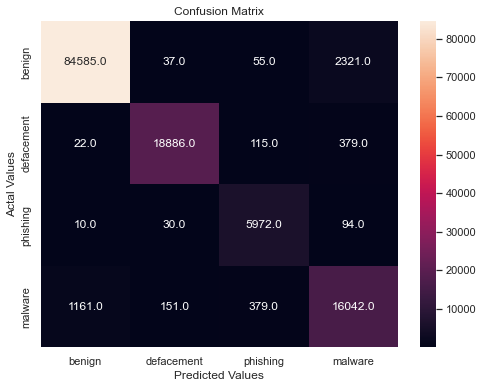

In [163]:
create_confusion_metric(Y_test_df , Y_pred_CNN)

In [165]:
History_CNN.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [164]:
acc_CNN = History_CNN.history['accuracy']
val_acc_CNN = History_CNN.history['val_accuracy']

loss_CNN = History_CNN.history['loss']
val_loss_CNN = History_CNN.history['val_loss']

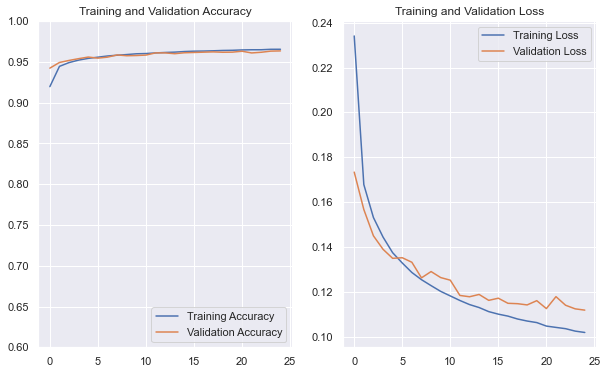

In [166]:
EPOCHS = 25

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc_CNN, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc_CNN, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.axis(ymin=0.6,ymax=1) 
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss_CNN, label='Training Loss')
plt.plot(range(EPOCHS), val_loss_CNN, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [167]:
model_CNN.evaluate(X_test_df, Y_test_df)

4070/4070 [==============================] - 11s 3ms/step - loss: 0.1118 - accuracy: 0.9635


[0.11183349788188934, 0.9634978771209717]

In [168]:
model_CNN.evaluate(X_train_df, Y_train_df)

16280/16280 [==============================] - 42s 3ms/step - loss: 0.0989 - accuracy: 0.9666


[0.09890121221542358, 0.9665727615356445]

In [169]:
model_CNN.save('Models/CNN1D.h5')